In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score, roc_curve, auc
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB
None
       Hours Studied  Previous Scores  Extracurricular Activities  \
count   10000.000000     10000.000000                10000.000000   
mean        4.992900        69.445700                    0.494800   
std         2.589309        17.343152                    0.499998   
min         1.000000        40.000000                   

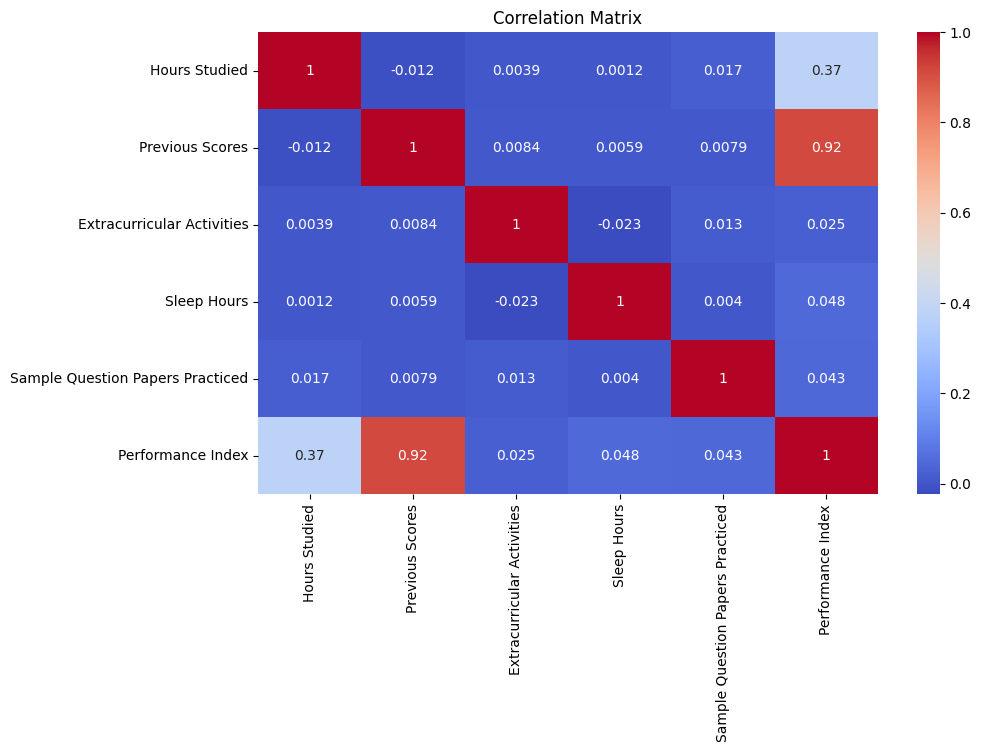

In [24]:
# Load data
df = pd.read_csv("Student_Performance.csv")
df.columns = df.columns.str.strip()

# Encode categorical column
le = LabelEncoder()
df['Extracurricular Activities'] = le.fit_transform(df['Extracurricular Activities'])

# Basic info
print(df.info())
print(df.describe())

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


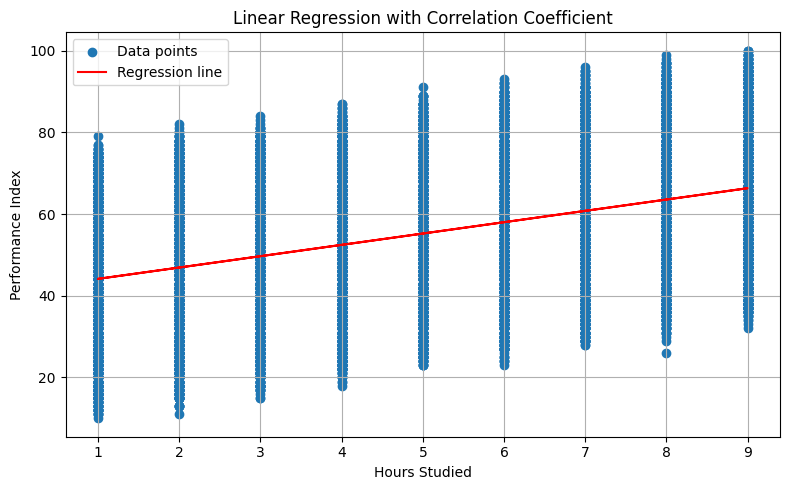

Slope: 2.773062824638938
Intercept: 41.37917462286025
Correlation coefficient (r): 0.37373035069872373
P-value: 0.0
Standard error: 0.06882975179827783


In [25]:
df.columns = df.columns.str.strip()


# Select features: Hours Studied vs Performance Index
x = df['Hours Studied']
y = df['Performance Index']

# Perform linear regression using scipy
slope, intercept, r, p, std_err = stats.linregress(x, y)

# Define regression function
def myfunc(x):
    return slope * x + intercept

# Generate predicted values
mymodel = list(map(myfunc, x))

# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label="Data points")
plt.plot(x, mymodel, color='red', label="Regression line")
plt.xlabel("Hours Studied")
plt.ylabel("Performance Index")
plt.title("Linear Regression with Correlation Coefficient")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Output regression statistics
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"Correlation coefficient (r): {r}")
print(f"P-value: {p}")
print(f"Standard error: {std_err}")



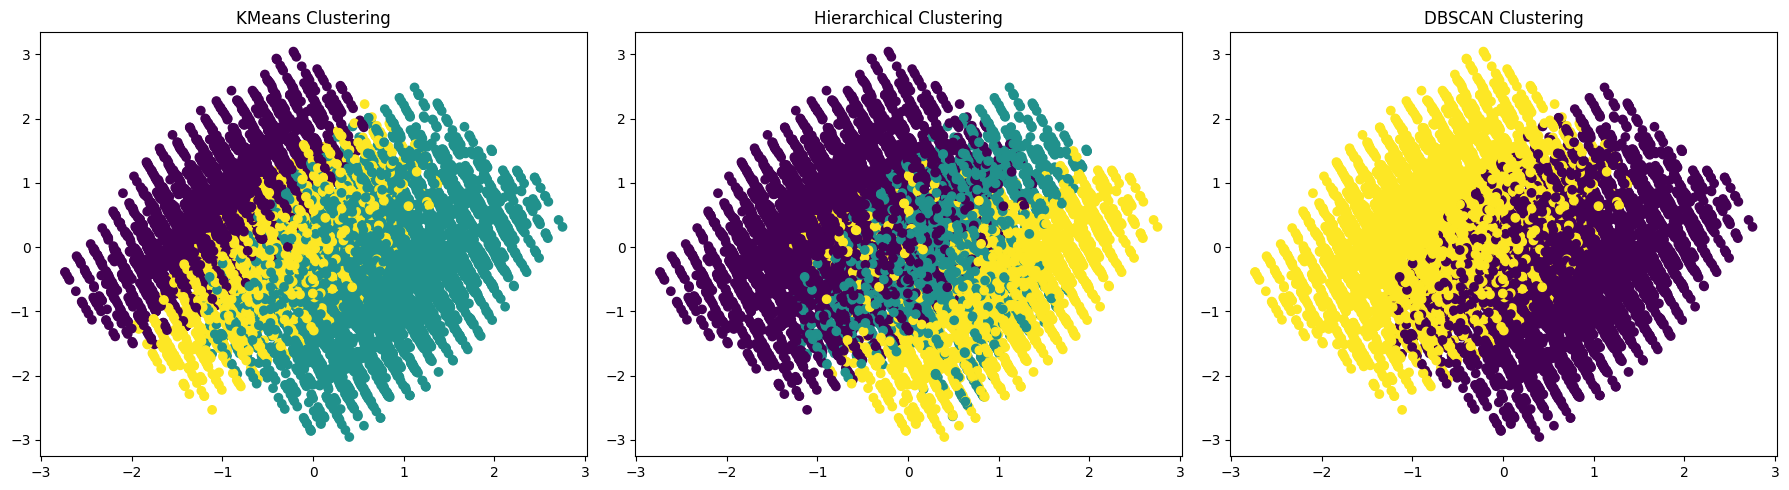

In [26]:
# Feature selection
X = df.drop('Performance Index', axis=1)

# Standardization

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans - elbow method / silhoutte score
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Hierarchical
linkage_matrix = linkage(X_scaled, method='ward')
hierarchical_labels = fcluster(linkage_matrix, t=3, criterion='maxclust')

# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels)
plt.title('KMeans Clustering')
plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels)
plt.title('Hierarchical Clustering')
plt.subplot(1, 3, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.tight_layout()
plt.show()


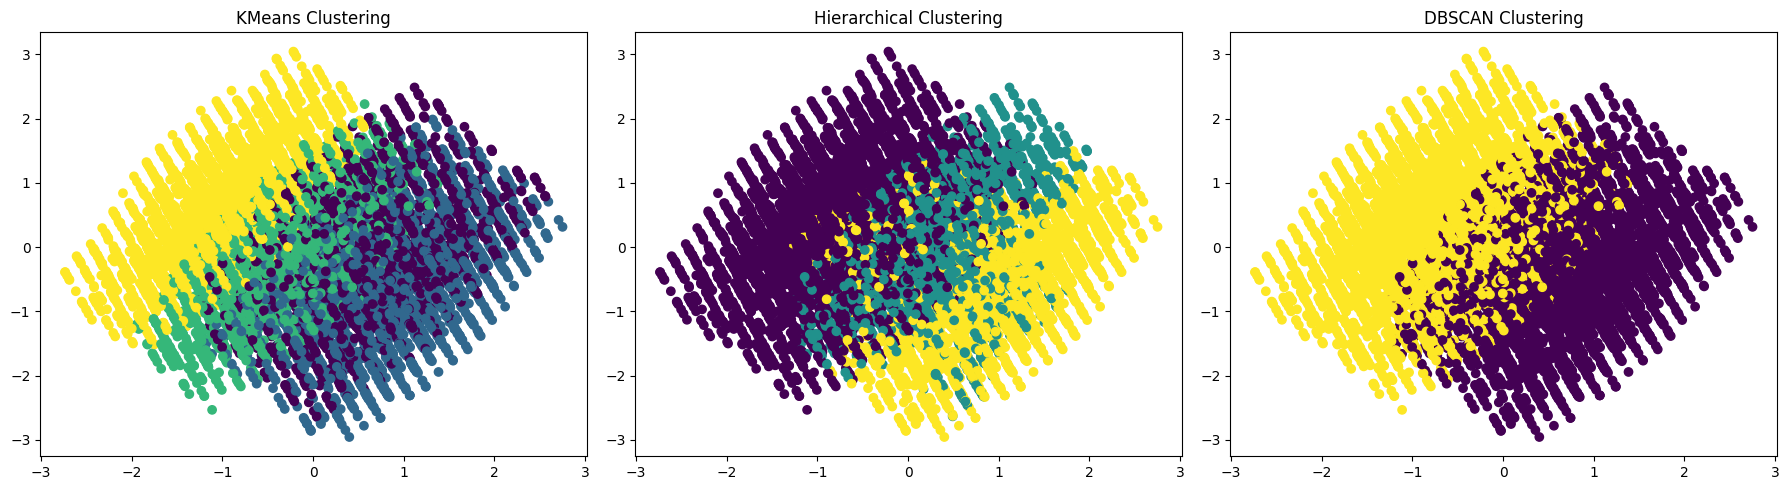

In [27]:
# Feature selection
X = df.drop('Performance Index', axis=1)

# Standardization

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans - elbow method / silhoutte score
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Hierarchical
linkage_matrix = linkage(X_scaled, method='ward')
hierarchical_labels = fcluster(linkage_matrix, t=3, criterion='maxclust')

# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels)
plt.title('KMeans Clustering')
plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels)
plt.title('Hierarchical Clustering')
plt.subplot(1, 3, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.tight_layout()
plt.show()


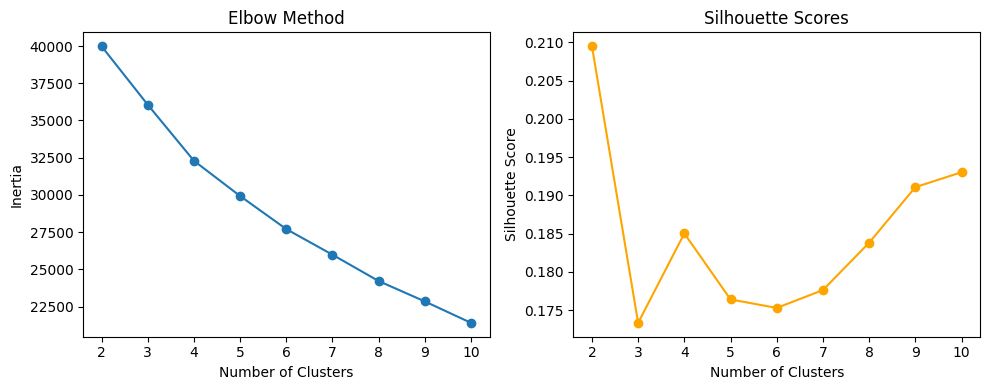

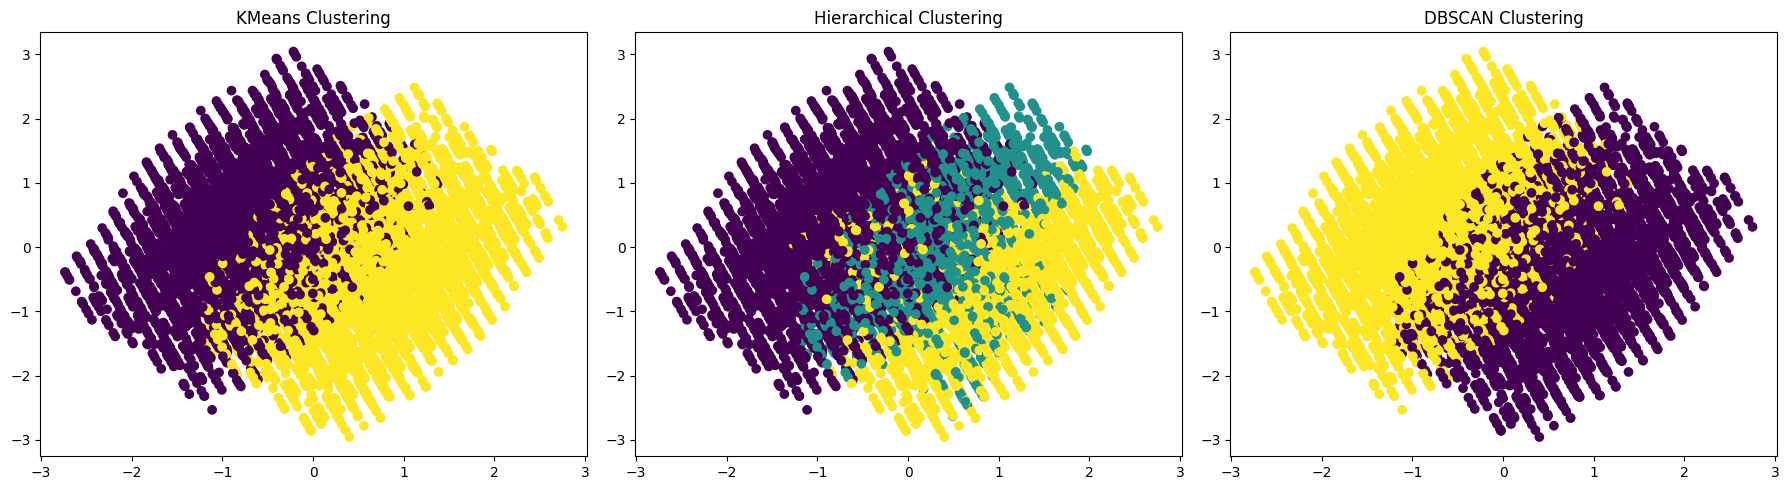

In [28]:
# Feature selection
X = df.drop('Performance Index', axis=1)

# Standardization

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans - elbow method / silhoutte score
from sklearn.metrics import silhouette_score

# Elbow and silhouette score
inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Curve
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.tight_layout()
plt.show()

# Choose best k
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)


# Hierarchical
linkage_matrix = linkage(X_scaled, method='ward')
hierarchical_labels = fcluster(linkage_matrix, t=3, criterion='maxclust')

# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels)
plt.title('KMeans Clustering')
plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels)
plt.title('Hierarchical Clustering')
plt.subplot(1, 3, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.tight_layout()
plt.show()


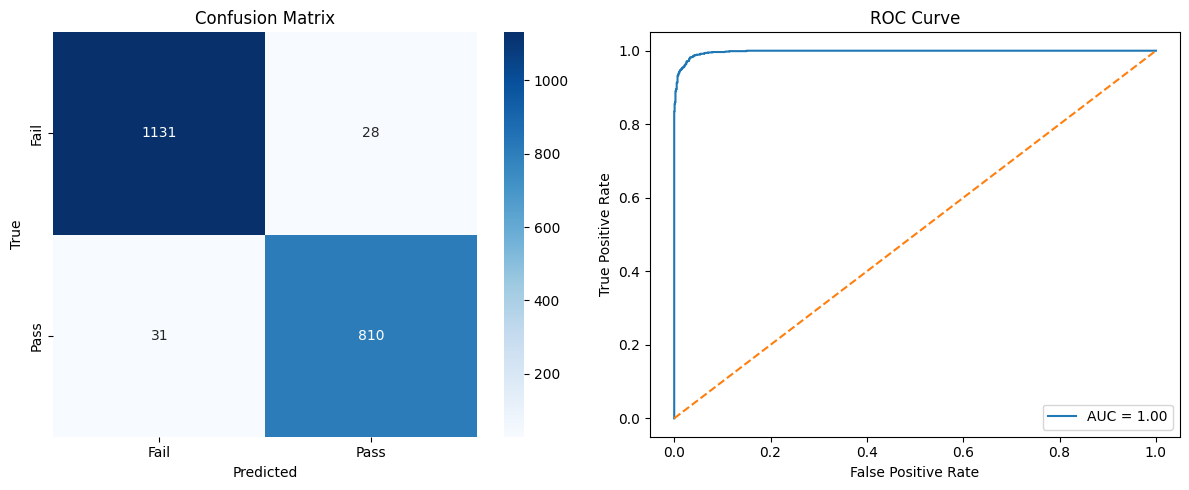

In [30]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test_c, y_pred_best_rf)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Fail", "Pass"], yticklabels=["Fail", "Pass"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

# ROC Curve
y_proba = best_rf.predict_proba(X_test_c)[:, 1]
fpr, tpr, _ = roc_curve(y_test_c, y_proba)
roc_auc = auc(fpr, tpr)

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()


In [31]:

# REGRESSION COMPARISON 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

X_reg = df.drop("Performance Index", axis=1)
y_reg = df["Performance Index"]

# Linear Regression
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.25, random_state=42)
lr = LinearRegression()
lr.fit(X_train_r, y_train_r)
y_pred_lr = lr.predict(X_test_r)
r2_lr = r2_score(y_test_r, y_pred_lr)

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_reg)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y_reg, test_size=0.25, random_state=42)
poly_model = LinearRegression()
poly_model.fit(X_train_p, y_train_p)
y_pred_poly = poly_model.predict(X_test_p)
r2_poly = r2_score(y_test_p, y_pred_poly)

#  CLASSIFICATION COMPARISON 

# Binary classification
y_cls = (df["Performance Index"] > df["Performance Index"].median()).astype(int)
X_cls = df.drop("Performance Index", axis=1)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cls, y_cls, test_size=0.25, random_state=42)

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_c, y_train_c)
roc_log = roc_auc_score(y_test_c, log_model.predict_proba(X_test_c)[:, 1])

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_c, y_train_c)
roc_rf = roc_auc_score(y_test_c, rf_model.predict_proba(X_test_c)[:, 1])

# SVM
svm_model = SVC(probability=True)
svm_model.fit(X_train_c, y_train_c)
roc_svm = roc_auc_score(y_test_c, svm_model.predict_proba(X_test_c)[:, 1])

# SELECT BEST MODELS 

# Regression selection
best_reg_model = "Polynomial Regression" if r2_poly > r2_lr else "Linear Regression"

# Classification selection
auc_scores = {
    "Logistic Regression": roc_log,
    "Random Forest": roc_rf,
    "SVM": roc_svm
}
best_cls_model = max(auc_scores, key=auc_scores.get)

# CLUSTERING COMPARISON 

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score

X_scaled = StandardScaler().fit_transform(X_cls)

kmeans = KMeans(n_clusters=2, random_state=42).fit(X_scaled)
dbscan = DBSCAN(eps=1.5, min_samples=5).fit(X_scaled)
agg = AgglomerativeClustering(n_clusters=2).fit(X_scaled)

ari_scores = {
    "KMeans": adjusted_rand_score(y_cls, kmeans.labels_),
    "DBSCAN": adjusted_rand_score(y_cls, dbscan.labels_),
    "Agglomerative": adjusted_rand_score(y_cls, agg.labels_)
}
best_cluster_model = max(ari_scores, key=ari_scores.get)

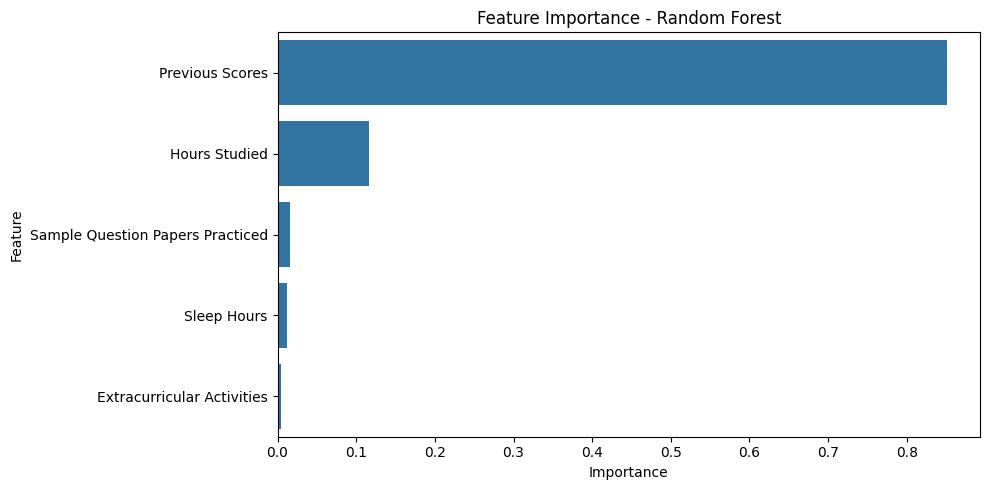

In [32]:
# Feature Importance Plot
importances = best_rf.feature_importances_
features = df.drop('Performance Index', axis=1).columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [33]:
# Use this block and DO NOT overwrite X_train_c, y_train_c again
y_cls = (df["Performance Index"] >= 60).astype(int)
X_cls = df.drop("Performance Index", axis=1)
X_scaled = StandardScaler().fit_transform(X_cls)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_scaled, y_cls, test_size=0.2, random_state=42)

# Fit model
grid_search.fit(X_train_c, y_train_c)
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_c)

# Evaluation block (now this will work correctly)
train_acc = accuracy_score(y_train_c, best_rf.predict(X_train_c))
test_acc = accuracy_score(y_test_c, y_pred_best_rf)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy : {test_acc:.4f}")

if abs(train_acc - test_acc) < 0.05:
    print(" Model is a good fit.")
elif train_acc > test_acc:
    print(" Possible overfitting detected.")
else:
    print(" Possible underfitting detected.")


Train Accuracy: 0.9870
Test Accuracy : 0.9705
 Model is a good fit.


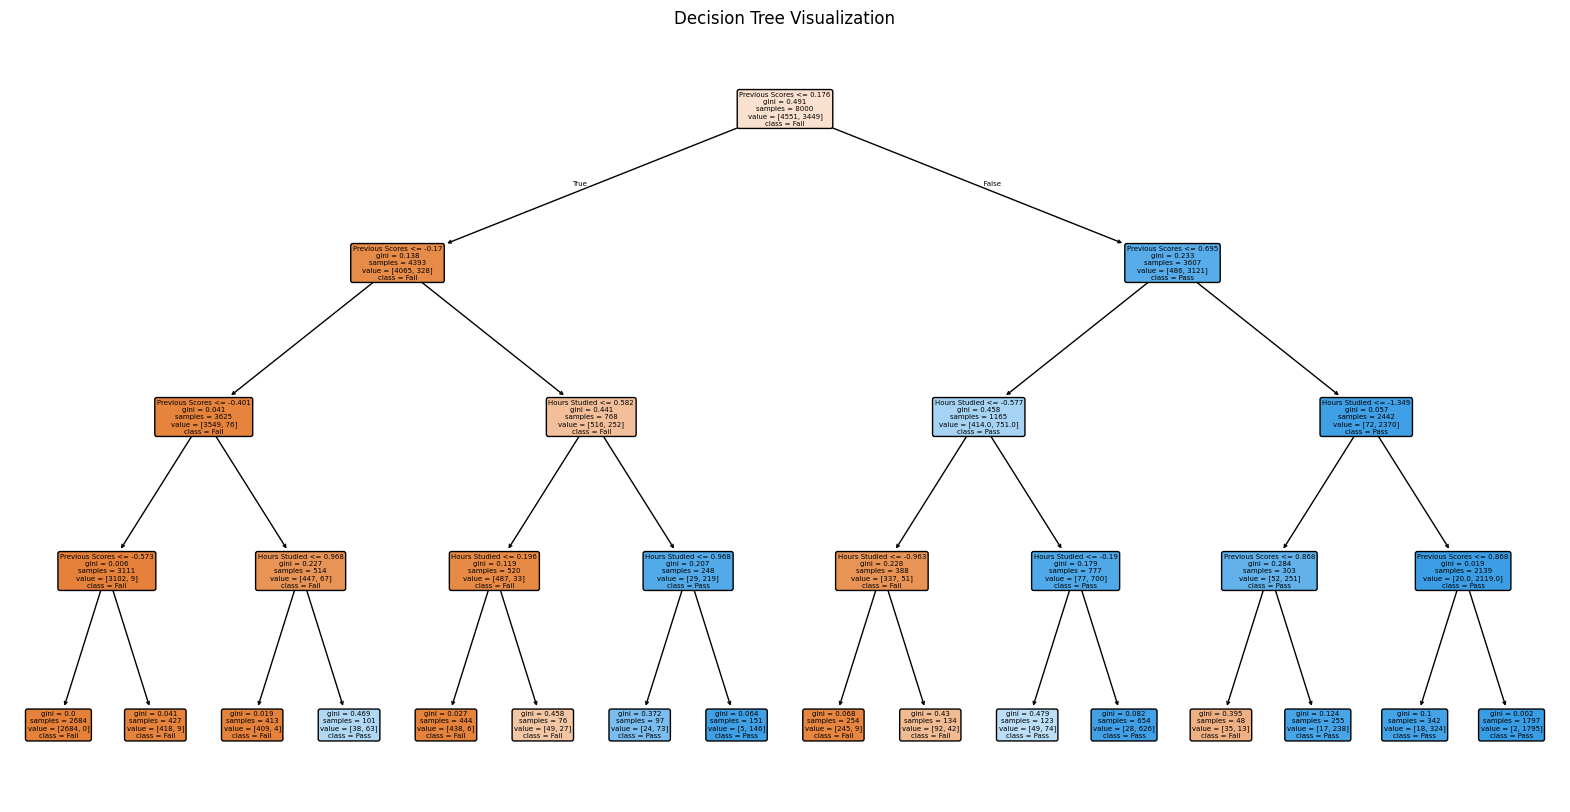

In [34]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Fit a basic decision tree
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train_c, y_train_c)

# Visualize it
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=df.drop("Performance Index", axis=1).columns, 
          class_names=["Fail", "Pass"], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


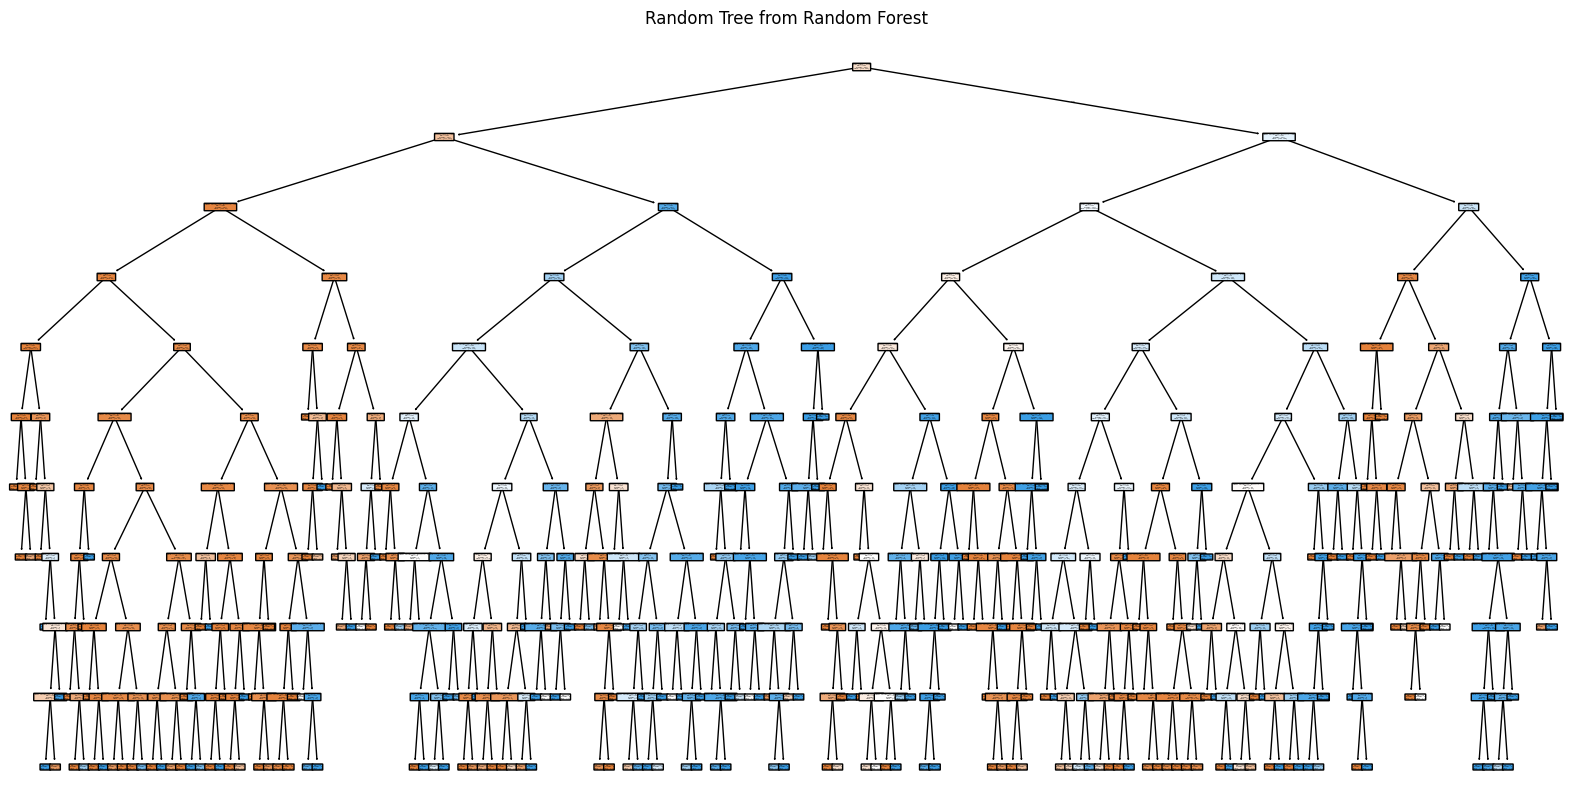

In [35]:
# Extract one tree from the forest
from sklearn.tree import plot_tree

single_tree = best_rf.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(single_tree, 
          feature_names=df.drop("Performance Index", axis=1).columns,
          class_names=["Fail", "Pass"], filled=True, rounded=True)
plt.title("Random Tree from Random Forest")
plt.show()


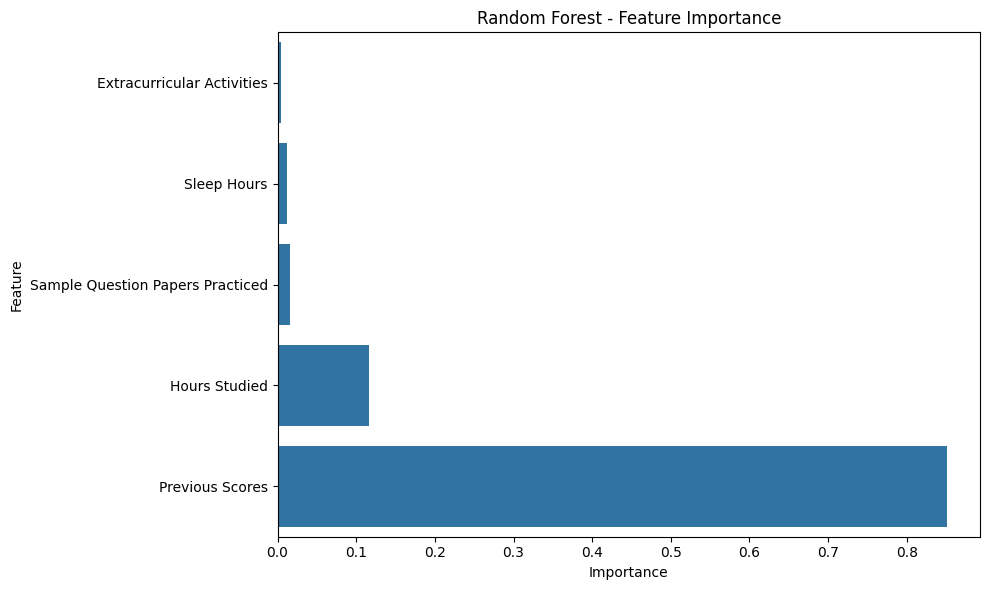

In [36]:
importances = best_rf.feature_importances_
features = df.drop('Performance Index', axis=1).columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Random Forest - Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


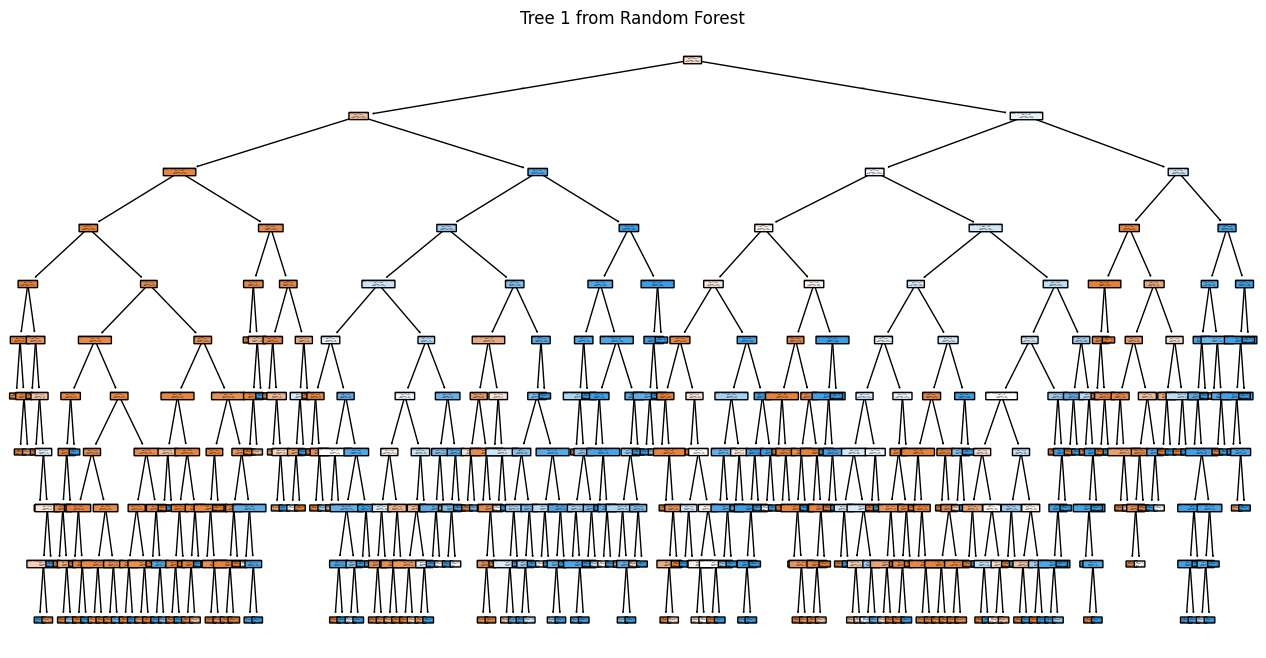

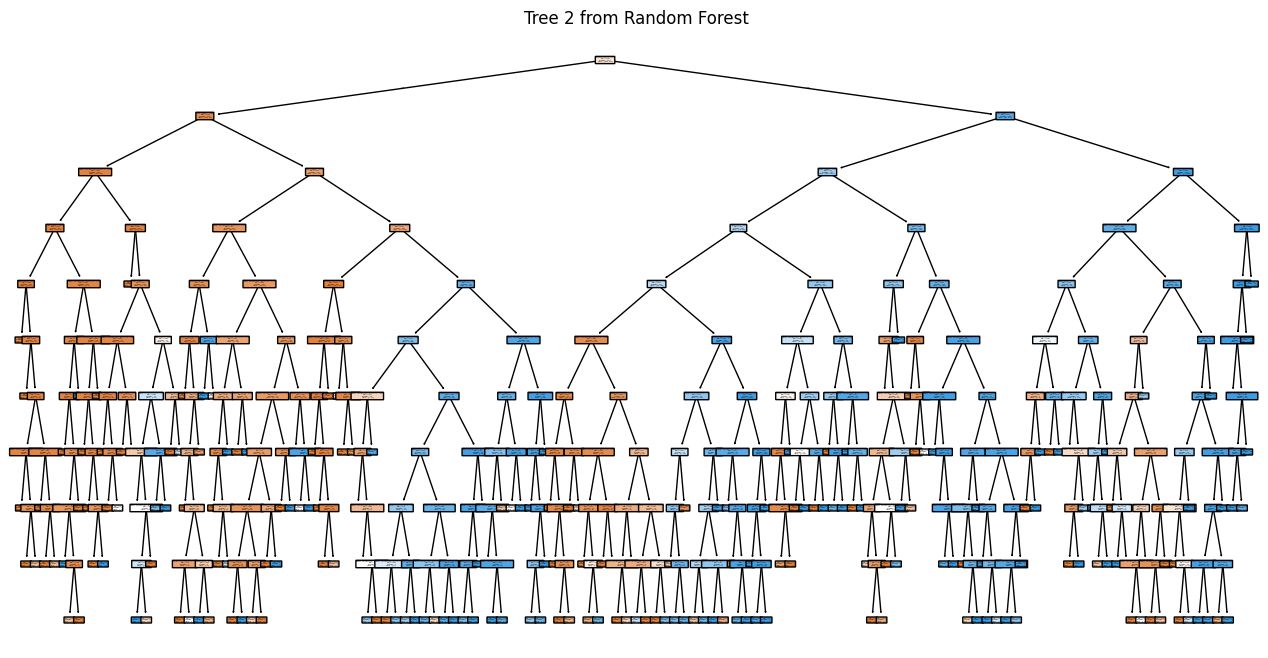

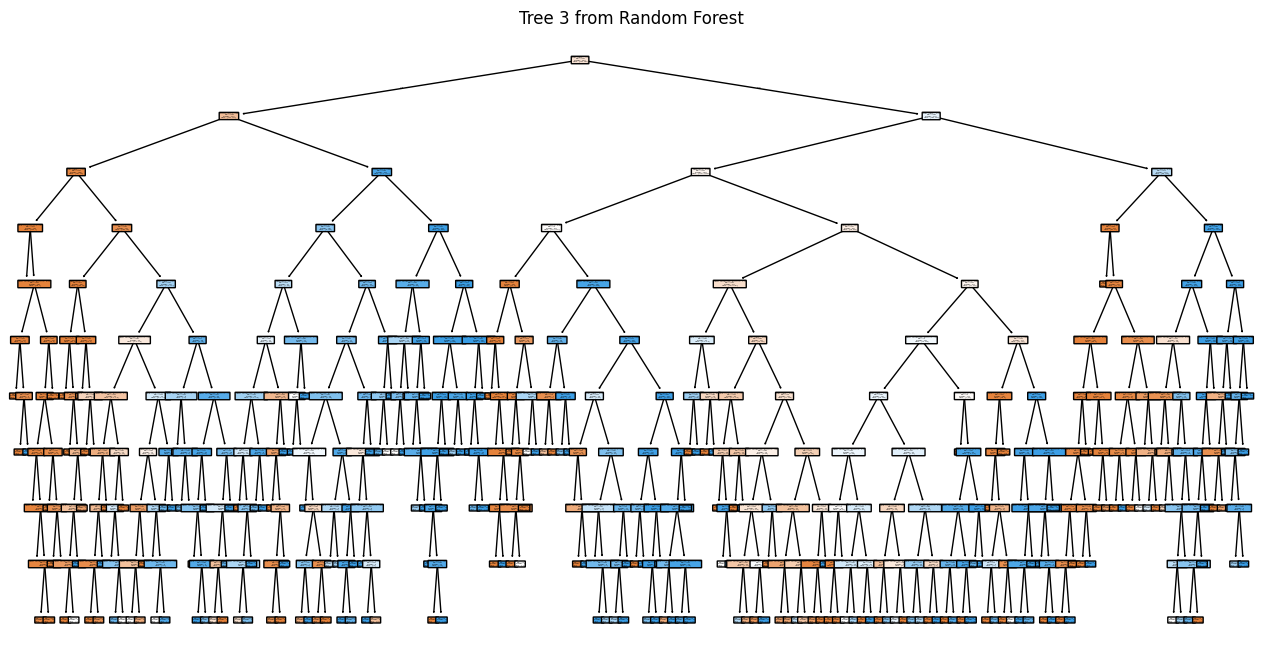

In [37]:
for i, tree in enumerate(best_rf.estimators_[:3]):
    plt.figure(figsize=(16, 8))
    plot_tree(tree, 
              feature_names=df.drop("Performance Index", axis=1).columns,
              class_names=["Fail", "Pass"], filled=True, rounded=True)
    plt.title(f"Tree {i+1} from Random Forest")
    plt.show()


In [40]:
# === Evaluation - train accuracy vs test accuracy to check underfit, overfit or good fit ===
from sklearn.metrics import accuracy_score, r2_score
import pandas as pd

print("\n=== Classification Models ===")

# Use correct column names to avoid warnings
feature_names = X_cls.columns

# Logistic Regression
log_train_acc = accuracy_score(y_train_c, log_model.predict(pd.DataFrame(X_train_c, columns=feature_names)))
log_test_acc = accuracy_score(y_test_c, log_model.predict(pd.DataFrame(X_test_c, columns=feature_names)))
print(f"Logistic Regression - Train Acc: {log_train_acc:.2f}, Test Acc: {log_test_acc:.2f}")
if abs(log_train_acc - log_test_acc) < 0.05:
    print(" → Good fit")
elif log_train_acc > log_test_acc:
    print(" → Overfitting")
else:
    print(" → Underfitting")

# Random Forest
rf_train_acc = accuracy_score(y_train_c, rf_model.predict(pd.DataFrame(X_train_c, columns=feature_names)))
rf_test_acc = accuracy_score(y_test_c, rf_model.predict(pd.DataFrame(X_test_c, columns=feature_names)))
print(f"Random Forest - Train Acc: {rf_train_acc:.2f}, Test Acc: {rf_test_acc:.2f}")
if abs(rf_train_acc - rf_test_acc) < 0.05:
    print(" → Good fit")
elif rf_train_acc > rf_test_acc:
    print(" → Overfitting")
else:
    print(" → Underfitting")

# SVM
svm_train_acc = accuracy_score(y_train_c, svm_model.predict(pd.DataFrame(X_train_c, columns=feature_names)))
svm_test_acc = accuracy_score(y_test_c, svm_model.predict(pd.DataFrame(X_test_c, columns=feature_names)))
print(f"SVM - Train Acc: {svm_train_acc:.2f}, Test Acc: {svm_test_acc:.2f}")
if abs(svm_train_acc - svm_test_acc) < 0.05:
    print(" → Good fit")
elif svm_train_acc > svm_test_acc:
    print(" → Overfitting")
else:
    print(" → Underfitting")

print("\n=== Regression Models ===")

# Linear Regression
lr_train_r2 = r2_score(y_train_r, lr.predict(X_train_r))
lr_test_r2 = r2_score(y_test_r, lr.predict(X_test_r))
print(f"Linear Regression - Train R²: {lr_train_r2:.2f}, Test R²: {lr_test_r2:.2f}")
if abs(lr_train_r2 - lr_test_r2) < 0.05:
    print(" → Good fit")
elif lr_train_r2 > lr_test_r2:
    print(" → Overfitting")
else:
    print(" → Underfitting")

# Polynomial Regression
poly_train_r2 = r2_score(y_train_p, poly_model.predict(X_train_p))
poly_test_r2 = r2_score(y_test_p, poly_model.predict(X_test_p))
print(f"Polynomial Regression - Train R²: {poly_train_r2:.2f}, Test R²: {poly_test_r2:.2f}")
if abs(poly_train_r2 - poly_test_r2) < 0.05:
    print(" → Good fit")
elif poly_train_r2 > poly_test_r2:
    print(" → Overfitting")
else:
    print(" → Underfitting")



=== Classification Models ===
Logistic Regression - Train Acc: 0.57, Test Acc: 0.58
 → Good fit
Random Forest - Train Acc: 0.57, Test Acc: 0.58
 → Good fit
SVM - Train Acc: 0.57, Test Acc: 0.58
 → Good fit

=== Regression Models ===
Linear Regression - Train R²: 0.99, Test R²: 0.99
 → Good fit
Polynomial Regression - Train R²: 0.99, Test R²: 0.99
 → Good fit


In [29]:
# Regression and Classification targets
y_reg = df['Performance Index']
y_cls = (df['Performance Index'] >= 60).astype(int)


# Train-test split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_scaled, y_reg, test_size=0.2, random_state=42)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_scaled, y_cls, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_r, y_train_r)
lr_scores = cross_val_score(lr, X_scaled, y_reg, cv=5, scoring='r2')
y_pred_lr = lr.predict(X_test_r)
r2 = r2_score(y_test_r, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test_r, y_pred_lr))

# Random Forest Classifier - visualization needed
rfc = RandomForestClassifier(random_state=42)
rfc_scores = cross_val_score(rfc, X_scaled, y_cls, cv=5, scoring='accuracy')

# Hyperparameter tuning
param_grid = {'n_estimators': [50, 100], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_c, y_train_c)
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_c)

# Training Percentage Regression
training_percentage_r = (len(X_train_r) / len(df)) * 100

training_percentage = (len(X_train_c) / len(df)) * 100

# Evaluation - train accuracy vs test accuracy to check underfit, overfit or good fit
print("Linear Regression R2:", r2)
print("Linear Regression RMSE:", rmse)
print(f" Regression Training Data Size: {len(X_train_r)} samples")
print(f" Total Data Size: {len(df)} samples")
print(f" Percentage of data used for training: {training_percentage_r:.2f}%" , "\n")

print(f" Classification Training Data Size: {len(X_train_c)} samples")
print(f" Total Data Size: {len(df)} samples")
print(f" Percentage of data used for training: {training_percentage:.2f}%", "\n")

print("Random Forest Accuracy:", accuracy_score(y_test_c, y_pred_best_rf) , "\n")

print("Confusion Matrix:\n", confusion_matrix(y_test_c, y_pred_best_rf))
print("Classification Report:\n", classification_report(y_test_c, y_pred_best_rf) , "\n")

Linear Regression R2: 0.9889832909573145
Linear Regression RMSE: 2.020551508505005
 Regression Training Data Size: 8000 samples
 Total Data Size: 10000 samples
 Percentage of data used for training: 80.00% 

 Classification Training Data Size: 8000 samples
 Total Data Size: 10000 samples
 Percentage of data used for training: 80.00% 

Random Forest Accuracy: 0.9705 

Confusion Matrix:
 [[1131   28]
 [  31  810]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      1159
           1       0.97      0.96      0.96       841

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000
 



In [38]:
print(" Final Model Selection Summary")
print("-" * 50)
print(" Best Performing Models Based on Evaluation Metrics:")
print(f"   • Regression       : {best_reg_model} (R² = {max(r2_lr, r2_poly):.4f})")
print(f"   • Classification   : {best_cls_model} (AUC = {auc_scores[best_cls_model]:.4f})")
print(f"   • Clustering       : {best_cluster_model} (ARI = {ari_scores[best_cluster_model]:.4f})")
print("-" * 50)

# Optional justification text
if best_reg_model == "Linear Regression":
    print(" Linear Regression outperformed Polynomial Regression in R² score.")
else:
    print(" Polynomial Regression achieved higher R² than Linear Regression.")

if best_cls_model == "Logistic Regression":
    print(" Logistic Regression had the highest AUC among classifiers.")
elif best_cls_model == "Random Forest":
    print(" Random Forest performed best in classification (highest AUC).")
else:
    print(" SVM achieved the best classification AUC.")

if best_cluster_model == "KMeans":
    print(" K-Means had the highest ARI among clustering methods.")
elif best_cluster_model == "Agglomerative":
    print(" Agglomerative (Hierarchical) Clustering had the best ARI score.")
else:
    print(" DBSCAN showed the best clustering ARI score.")


 Final Model Selection Summary
--------------------------------------------------
 Best Performing Models Based on Evaluation Metrics:
   • Regression       : Linear Regression (R² = 0.9891)
   • Classification   : Logistic Regression (AUC = 0.9980)
   • Clustering       : Agglomerative (ARI = 0.0002)
--------------------------------------------------
 Linear Regression outperformed Polynomial Regression in R² score.
 Logistic Regression had the highest AUC among classifiers.
 Agglomerative (Hierarchical) Clustering had the best ARI score.


In [39]:
sample_pass = {
    "Hours Studied": 7,
    "Previous Scores": 70,
    "Extracurricular Activities": 1,  # 1 = Yes
    "Sleep Hours": 5,
    "Sample Question Papers Practiced": 3
}

sample_fail = {
    "Hours Studied": 6,
    "Previous Scores": 70,
    "Extracurricular Activities": 1,  # 0 = No
    "Sleep Hours": 7,
    "Sample Question Papers Practiced": 2
}

def test_prediction(sample_input):
    input_df = pd.DataFrame([sample_input])
    scaled_input = scaler.transform(input_df)
    prediction = best_rf.predict(scaled_input)[0]
    probability = best_rf.predict_proba(scaled_input)[0][1]
    print(f"Prediction: {'Pass' if prediction == 1 else 'Fail'}")
    print(f"Probability of Passing: {probability:.2f}\n")

print(" Testing Sample PASS Input:")
test_prediction(sample_pass)

print(" Testing Sample FAIL Input:")
test_prediction(sample_fail)


 Testing Sample PASS Input:
Prediction: Pass
Probability of Passing: 0.84

 Testing Sample FAIL Input:
Prediction: Fail
Probability of Passing: 0.28

